In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()

In [2]:
model = 'resnet10/0'
epoch = '11'

filen = '../results/'+model+'/preds_epoch_'+epoch+'.csv'
preds = pd.read_csv('preds_epoch_5.csv')

preds['Error']     = np.subtract(preds['Pred'].to_list(), preds['Label'].to_list())
preds['Abs error'] = np.abs(np.subtract(preds['Pred'].to_list(), preds['Label'].to_list()))
preds.head(5)

,Pred,Label,Error,Abs error
0,56.606033,64.203110,-7.597077,7.597077
1,36.979107,33.404690,3.574417,3.574417
2,53.824210,66.532630,-12.708420,12.708420
3,65.882034,71.413020,-5.530986,5.530986
4,69.072700,57.436077,11.636623,11.636623


In [3]:
counts = np.zeros(8, dtype=int)
errors = np.zeros(8, dtype=float)
all_errors = preds['Error'].to_list()
for i, age in enumerate(preds['Label'].to_list()):
    idx = int(np.floor(age/10)-1)
    counts[idx]+=1
    errors[idx]+=all_errors[i]
for i in range(8):
    errors[i]/=counts[i]
print(counts)
print(errors)

[ 13  84 186 294 347 171  69  11]
[ 24.361029    15.22346979   9.92400245   4.0816063   -0.31396001
  -6.2091535  -12.46370541 -22.07652836]


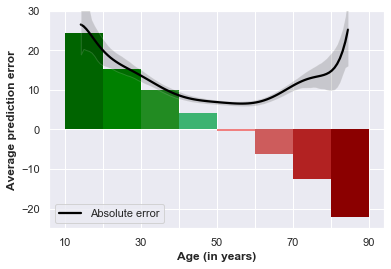

In [5]:
colors = ['darkgreen','green','forestgreen','mediumseagreen',
         'lightcoral','indianred','firebrick','darkred']

# sns.barplot(list(range(10,90,10)), errors)
ax = plt.bar(list(range(10,90,10)), height=errors, width=10, align='edge', linewidth=0, color=colors)
ax = sns.regplot(x='Label', y='Abs error', data=preds, scatter=False, order=10, label='Absolute error',
            color='black', x_ci='sd')
plt.setp(ax.collections, zorder=100)
# sns.regplot(x='Label', y='Error', data=preds, scatter=False, order=10, label='Error')
plt.ylabel('Average prediction error', weight='bold')
plt.ylim(-25,30)
plt.xlabel('Age (in years)', weight='bold')
plt.xticks(list(range(10,100,10)), [10,'',30,'',50,'',70,'',90])

plt.legend()
# plt.show()
plt.savefig('figures/estimation_bias_3D-CNN_2_EP5.png', bbox_inches='tight')